In [ ]:
# Final Project
# MCM Regression Analysis - all features 

# Objetive - Estimate conversion (PTP) for Outbound team in a Collections Call Center 

# This approach includes all variables from data set and all observations 

In [ ]:
# Summary of findings

# CLEANINIG DATASET
# With visualization of Histograms and Scatter plots I can anticipate DIALS above 75K may not be relevant for this project 
# Hence suggest to remove values above 75K dials to gain accuracy 
# this can be a possible scenario to increase results from model

# Production hours also can be reduced down to 50 hours, and drop values higher than that as those can be considered noise
# There also seems to be noise in RPC data, due to outliers. Suggest to take a closer look to this valiable 

# Covariance Matrix
# It indicates that changes in one variable are not strongly associated with changes in a second variable
# due to low values in graph



In [ ]:
# Observations made throughout the analysis

# Datasets created
# 1: overhead --> is the original dataset
# 2: overhead2 --> clean ds and rename columns


In [ ]:
# Future Recomendations

# Given the high accuracy of the RF model 99.9%, concerns about overfitting but also explains "high linearity" of the data
# Consider testing model with all variables, maybe will reduce accuracy however, model could be more robust to face changes
# from the datasource. For example if we add more observation to the data set to put model in production, and/or to predict
# PTP from different teams which handle different inventory characteristics

In [1]:
# Imports
import math
import pandas as pd  # --> panel data
import numpy as np   # --> to do math 'mathy' things
import math
from math import sqrt
import scipy
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
import sklearn
import random

#Estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
from sklearn.model_selection import train_test_split

# Feature Engineering
from sklearn.decomposition import PCA 
from sklearn import preprocessing 



In [2]:
# Clasification Models
# Add Sci Kit
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Import and Prepare the Data 

In [4]:
overhead = pd.read_csv (r'C:\Users\Milena\Documents\Big Data\Caso Final\Overhead_data_frame.csv', header =0)

In [5]:
overhead.head()

,ACT_DATE,DAY,PST TIME,DIALS,RPC,PTP,TSRCOUNT,PRD HOURS
0,"Jan 2, 2019",Wed,5,2973,23,3,12,8.54
1,"Jan 2, 2019",Wed,6,3014,24,1,11,7.52
2,"Jan 2, 2019",Wed,7,3903,20,0,10,7.92
3,"Jan 2, 2019",Wed,8,2919,31,2,13,8.08
4,"Jan 2, 2019",Wed,9,1756,48,4,19,11.57


In [6]:
overhead.describe()
# Other than DATE, There seems to be 1 nominal column, not numeric... DAY
# Also observing different count in Production Hours column

,PST TIME,DIALS,RPC,PTP,TSRCOUNT,PRD HOURS
count,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4787.000000
mean,11.147817,6986.770062,21.786694,1.123077,15.018087,8.735206
std,3.760503,13903.554482,19.492293,1.483334,10.841851,7.456876
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,992.500000,7.000000,0.000000,6.000000,2.930000
50%,11.000000,2958.500000,17.000000,1.000000,13.000000,7.050000
75%,14.000000,7404.500000,32.000000,2.000000,21.000000,12.540000
max,20.000000,174301.000000,162.000000,11.000000,72.000000,54.160000


In [7]:
overhead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 8 columns):
ACT_DATE     4810 non-null object
DAY          4810 non-null object
PST TIME     4810 non-null int64
DIALS        4810 non-null int64
RPC          4810 non-null int64
PTP          4810 non-null int64
TSRCOUNT     4810 non-null int64
PRD HOURS    4787 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 300.8+ KB


In [8]:
# Change data type for DAY and PST Time, "from Object to int64"


def WEEKDAY(argument):
    switcher = {
        "Mon": 1,
        "Tue": 2,
        "Wed": 3,
        "Thu": 4,
        "Fri": 5,
        "Sat": 6,
        "Sun": 7
    }
    return switcher.get(argument, "nothing")

In [9]:
# Create WEEKDAY dictionary 
WEEKDAY_dictionary ={"Mon": 1,"Tue": 2,"Wed": 3,"Thu": 4,"Fri": 5,"Sat": 6,"Sun": 7}

In [10]:
# Change WEEKDAY values in the dataset 
overhead['DAY'] = overhead['DAY'].map(WEEKDAY_dictionary)

In [11]:
overhead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 8 columns):
ACT_DATE     4810 non-null object
DAY          4810 non-null int64
PST TIME     4810 non-null int64
DIALS        4810 non-null int64
RPC          4810 non-null int64
PTP          4810 non-null int64
TSRCOUNT     4810 non-null int64
PRD HOURS    4787 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 300.8+ KB


In [12]:
print(overhead)

          ACT_DATE  DAY  PST TIME  DIALS  RPC  PTP  TSRCOUNT  PRD HOURS
0      Jan 2, 2019    3         5   2973   23    3        12       8.54
1      Jan 2, 2019    3         6   3014   24    1        11       7.52
2      Jan 2, 2019    3         7   3903   20    0        10       7.92
3      Jan 2, 2019    3         8   2919   31    2        13       8.08
4      Jan 2, 2019    3         9   1756   48    4        19      11.57
...            ...  ...       ...    ...  ...  ...       ...        ...
4805  Mar 21, 2020    6        14   6059   69    2        21      14.57
4806  Mar 21, 2020    6        15  10452   44    1        22      11.59
4807  Mar 21, 2020    6        16   6522   39    1        22      12.54
4808  Mar 21, 2020    6        17   7687   31    2        21      10.61
4809  Mar 21, 2020    6        18     11    2    1         3       0.18

[4810 rows x 8 columns]


In [13]:
from datetime import datetime

In [14]:
overhead["ACT_DATE"] = pd.to_datetime(overhead["ACT_DATE"]) # changed ACT_DATE to date format

In [15]:
overhead["ACT_DATE"]

0      2019-01-02
1      2019-01-02
2      2019-01-02
3      2019-01-02
4      2019-01-02
          ...    
4805   2020-03-21
4806   2020-03-21
4807   2020-03-21
4808   2020-03-21
4809   2020-03-21
Name: ACT_DATE, Length: 4810, dtype: datetime64[ns]

In [16]:
overhead["ACT_DATE"].dt.month # extraxt month number from date format

0       1
1       1
2       1
3       1
4       1
       ..
4805    3
4806    3
4807    3
4808    3
4809    3
Name: ACT_DATE, Length: 4810, dtype: int64

In [17]:
# Change ACT_DATE values in the dataset 
overhead['ACT_DATE'] = overhead["ACT_DATE"].dt.month

In [18]:
overhead.info() # verify ACT_DATE is a numeric value -- int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 8 columns):
ACT_DATE     4810 non-null int64
DAY          4810 non-null int64
PST TIME     4810 non-null int64
DIALS        4810 non-null int64
RPC          4810 non-null int64
PTP          4810 non-null int64
TSRCOUNT     4810 non-null int64
PRD HOURS    4787 non-null float64
dtypes: float64(1), int64(7)
memory usage: 300.8 KB


In [19]:
# Change column name
overhead2 = overhead.rename(columns= {'ACT_DATE': 'MONTH', 
                                   'DAY': 'WEEK DAY', 
                                   'TSRCOUNT': 'HEADCOUNT',})
for col in overhead2.columns: 
    print(col) 

MONTH
WEEK DAY
PST TIME
DIALS
RPC
PTP
HEADCOUNT
PRD HOURS


In [20]:
print(overhead2)

      MONTH  WEEK DAY  PST TIME  DIALS  RPC  PTP  HEADCOUNT  PRD HOURS
0         1         3         5   2973   23    3         12       8.54
1         1         3         6   3014   24    1         11       7.52
2         1         3         7   3903   20    0         10       7.92
3         1         3         8   2919   31    2         13       8.08
4         1         3         9   1756   48    4         19      11.57
...     ...       ...       ...    ...  ...  ...        ...        ...
4805      3         6        14   6059   69    2         21      14.57
4806      3         6        15  10452   44    1         22      11.59
4807      3         6        16   6522   39    1         22      12.54
4808      3         6        17   7687   31    2         21      10.61
4809      3         6        18     11    2    1          3       0.18

[4810 rows x 8 columns]


In [21]:
# Remove NULL values - drop nulls

In [22]:
overhead2 = overhead2.dropna(subset=['PRD HOURS'])

In [23]:
overhead2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4787 entries, 0 to 4809
Data columns (total 8 columns):
MONTH        4787 non-null int64
WEEK DAY     4787 non-null int64
PST TIME     4787 non-null int64
DIALS        4787 non-null int64
RPC          4787 non-null int64
PTP          4787 non-null int64
HEADCOUNT    4787 non-null int64
PRD HOURS    4787 non-null float64
dtypes: float64(1), int64(7)
memory usage: 336.6 KB


In [24]:
import sys 

In [25]:
print('SUMMARY STATISTICS OF NUMERIC COLUMNS')
print()
print(overhead2.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

            count         mean           std  min      25%      50%      75%  \
MONTH      4787.0     5.503447      3.405359  1.0     2.00     5.00     8.00   
WEEK DAY   4787.0     3.737623      1.876263  1.0     2.00     4.00     5.00   
PST TIME   4787.0    11.111970      3.731480  5.0     8.00    11.00    14.00   
DIALS      4787.0  7020.332985  13928.466531  1.0  1013.50  2988.00  7450.00   
RPC        4787.0    21.891372     19.480333  0.0     7.00    17.00    32.00   
PTP        4787.0     1.128473      1.484844  0.0     0.00     1.00     2.00   
HEADCOUNT  4787.0    15.090244     10.817649  0.0     6.00    13.00    21.00   
PRD HOURS  4787.0     8.735206      7.456876  0.0     2.93     7.05    12.54   

                 max  
MONTH          12.00  
WEEK DAY        7.00  
PST TIME       20.00  
DIALS      174301.00  
RPC           162.00  
PTP            11.00  
HEADCOUNT      72.00  
PRD HOURS      54.16  


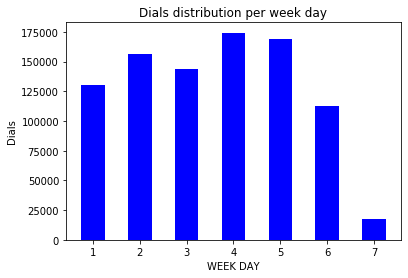

In [26]:
x = overhead2['WEEK DAY']
y = overhead2['DIALS']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='b', align='center')
plt.title('Dials distribution per week day')
plt.xlabel('WEEK DAY')
plt.ylabel('Dials')
plt.show()

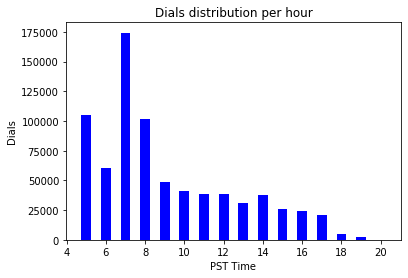

In [27]:
x = overhead2['PST TIME']
y = overhead2['DIALS']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='b', align='center')
plt.title('Dials distribution per hour')
plt.xlabel('PST Time')
plt.ylabel('Dials')
plt.show()

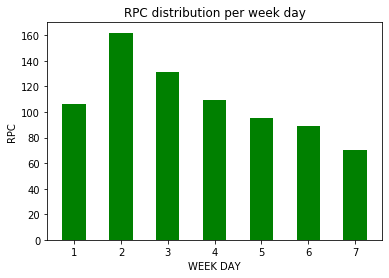

In [28]:
x = overhead2['WEEK DAY']
y = overhead2['RPC']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='g', align='center')
plt.title('RPC distribution per week day')
plt.xlabel('WEEK DAY')
plt.ylabel('RPC')
plt.show()

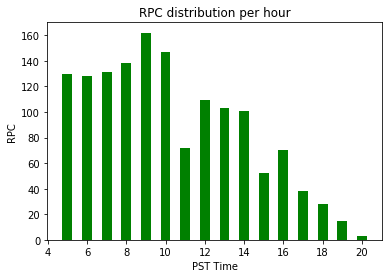

In [29]:
x = overhead2['PST TIME']
y = overhead2['RPC']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='g', align='center')
plt.title('RPC distribution per hour')
plt.xlabel('PST Time')
plt.ylabel('RPC')
plt.show()

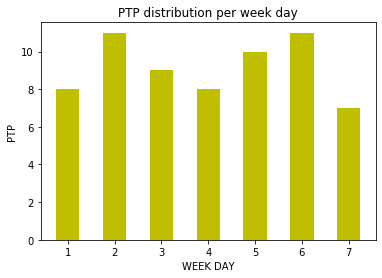

In [30]:
x = overhead2['WEEK DAY']
y = overhead2['PTP']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='y', align='center')
plt.title('PTP distribution per week day')
plt.xlabel('WEEK DAY')
plt.ylabel('PTP')
plt.show()

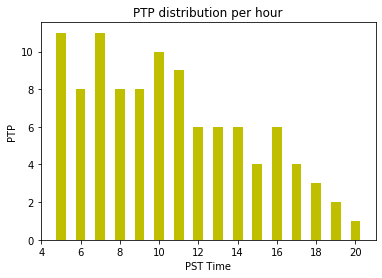

In [31]:
x = overhead2['PST TIME']
y = overhead2['PTP']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='y', align='center')
plt.title('PTP distribution per hour')
plt.xlabel('PST Time')
plt.ylabel('PTP')
plt.show()

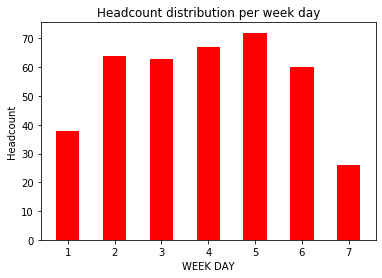

In [32]:
x = overhead2['WEEK DAY']
y = overhead2['HEADCOUNT']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='r', align='center')
plt.title('Headcount distribution per week day')
plt.xlabel('WEEK DAY')
plt.ylabel('Headcount')
plt.show()

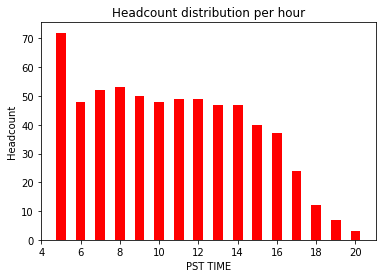

In [33]:
x = overhead2['PST TIME']
y = overhead2['HEADCOUNT']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='r', align='center')
plt.title('Headcount distribution per hour')
plt.xlabel('PST TIME')
plt.ylabel('Headcount')
plt.show()

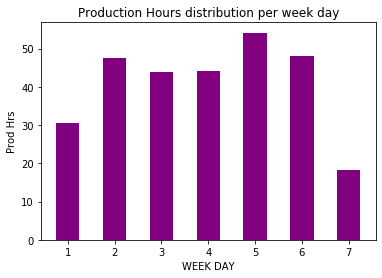

In [34]:
x = overhead2['WEEK DAY']
y = overhead2['PRD HOURS']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='purple', align='center')
plt.title('Production Hours distribution per week day')
plt.xlabel('WEEK DAY')
plt.ylabel('Prod Hrs')
plt.show()

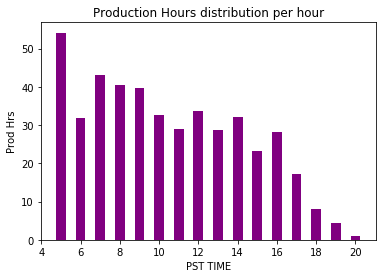

In [35]:
x = overhead2['PST TIME']
y = overhead2['PRD HOURS']
ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='purple', align='center')
plt.title('Production Hours distribution per hour')
plt.xlabel('PST TIME')
plt.ylabel('Prod Hrs')
plt.show()

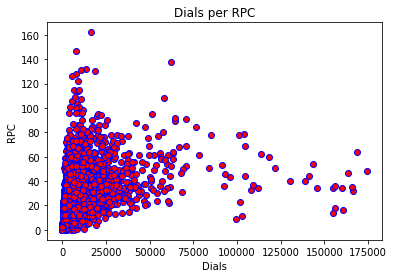

In [36]:
# Scatter plots 
# Scatter plots are very useful for comparing two features and understanding any possible relationships between the data
# Set the two features equal to variables

x = overhead2['DIALS']
y = overhead2['RPC']
plt.scatter(x,y,color='r',edgecolors='b')
#plt.xticks(np.arange(0,175001, 25000))
plt.title('Dials per RPC')
plt.xlabel('Dials')
plt.ylabel('RPC')
plt.show()

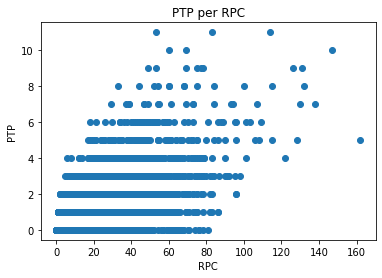

In [37]:
x = overhead2['RPC']
y = overhead2['PTP']
plt.scatter(x,y)
plt.title('PTP per RPC')
plt.xlabel('RPC')
plt.ylabel('PTP')
plt.show()

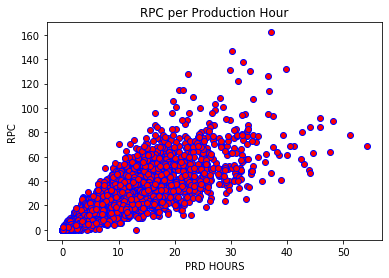

In [38]:
x = overhead2['PRD HOURS']
y = overhead2['RPC']
plt.scatter(x,y,color='r',edgecolors='b')
#plt.xticks(np.arange(0,175001, 25000))
plt.title('RPC per Production Hour')
plt.xlabel('PRD HOURS')
plt.ylabel('RPC')
plt.show()

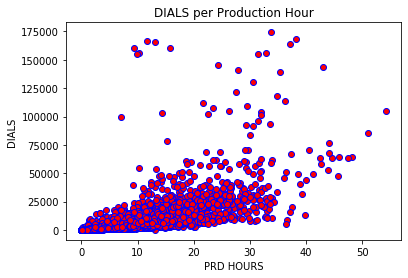

In [39]:
x = overhead2['PRD HOURS']
y = overhead2['DIALS']
plt.scatter(x,y,color='r',edgecolors='b')
#plt.xticks(np.arange(0,175001, 25000))
plt.title('DIALS per Production Hour')
plt.xlabel('PRD HOURS')
plt.ylabel('DIALS')
plt.show()

In [40]:
# With visualization help of Histograms and Scatter plot I can anticipate dials above 75K may not be relevant for this project 
# Hence suggest to remove values above 75K dials to gain accuracy 
# this can be a possible scenario to increase results 

In [41]:
# Correlation 
# addressing collinearity or checking for relationships between features for selection or engineering
# calculating correlation is vital part of all Data Science projects

correlationMat = overhead2.corr()
print(correlationMat)

              MONTH  WEEK DAY  PST TIME     DIALS       RPC       PTP  \
MONTH      1.000000  0.001482  0.026640 -0.070649 -0.089865 -0.082959   
WEEK DAY   0.001482  1.000000 -0.078500  0.002161 -0.044798 -0.017897   
PST TIME   0.026640 -0.078500  1.000000 -0.243548 -0.350161 -0.302209   
DIALS     -0.070649  0.002161 -0.243548  1.000000  0.392696  0.259179   
RPC       -0.089865 -0.044798 -0.350161  0.392696  1.000000  0.593470   
PTP       -0.082959 -0.017897 -0.302209  0.259179  0.593470  1.000000   
HEADCOUNT -0.070159 -0.047907 -0.289715  0.594740  0.760052  0.470002   
PRD HOURS -0.079140 -0.032264 -0.334656  0.636353  0.832934  0.530215   

           HEADCOUNT  PRD HOURS  
MONTH      -0.070159  -0.079140  
WEEK DAY   -0.047907  -0.032264  
PST TIME   -0.289715  -0.334656  
DIALS       0.594740   0.636353  
RPC         0.760052   0.832934  
PTP         0.470002   0.530215  
HEADCOUNT   1.000000   0.939695  
PRD HOURS   0.939695   1.000000  


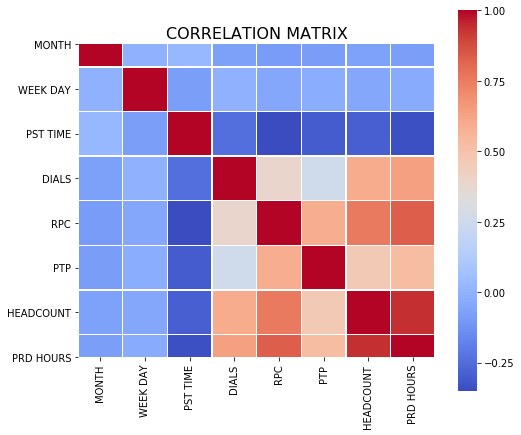

In [42]:
f,ax = plt.subplots(figsize=(8,7))
sn.heatmap(correlationMat, cbar=True, square = True, annot= False, fmt='.1f',xticklabels=True,yticklabels=True,
           cmap="coolwarm", linewidths = .5, ax=ax)
plt.title('CORRELATION MATRIX', size=16);

In [43]:
# Most correlated variables are dials, RPCs, PTPs, headcount and Production hours 
# However all variables will be considered in this approach to analize data set, hence not dropping any variable
# For correlated approach to this exercise please reffer to MCM Regression Analysis --> (selected features)  

In [44]:
# Covariance
# You can use covariance to measure how changes in one variable are associated with changes in a second variable
# This will be very important when studying the impact various features might have on default rates
# Variance measures the variation of a single random variable (like the height of a person in a population)
# whereas covariance is a measure of how much two random variables vary together 
# (like the height of a person and the weight of a person in a population).

covarianceMat = overhead2.cov()
print(covarianceMat)

                 MONTH   WEEK DAY      PST TIME         DIALS            RPC  \
MONTH        11.596467   0.009471      0.338519 -3.350961e+03      -5.961389   
WEEK DAY      0.009471   3.520362     -0.549596  5.647539e+01      -1.637367   
PST TIME      0.338519  -0.549596     13.923942 -1.265811e+04     -25.453359   
DIALS     -3350.960613  56.475393 -12658.112094  1.940022e+08  106550.549969   
RPC          -5.961389  -1.637367    -25.453359  1.065505e+05     379.483392   
PTP          -0.419478  -0.049862     -1.674438  5.360232e+03      17.166278   
HEADCOUNT    -2.584515  -0.972347    -11.694603  8.961146e+04     160.166930   
PRD HOURS    -2.009636  -0.451407     -9.311866  6.609344e+04     120.993988   

                   PTP     HEADCOUNT     PRD HOURS  
MONTH        -0.419478     -2.584515     -2.009636  
WEEK DAY     -0.049862     -0.972347     -0.451407  
PST TIME     -1.674438    -11.694603     -9.311866  
DIALS      5360.232180  89611.455527  66093.440395  
RPC          1

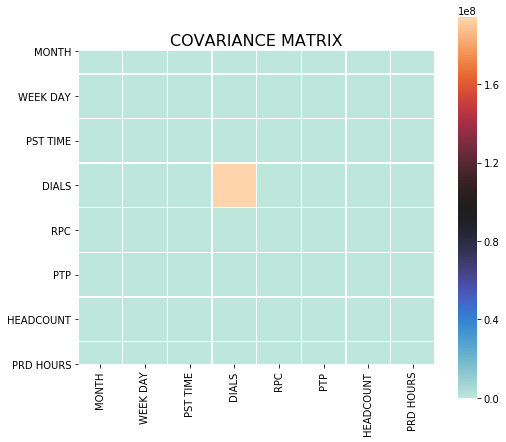

In [45]:
f,ax = plt.subplots(figsize=(8,7))
sn.heatmap(covarianceMat, cbar=True, square = True, annot= False, fmt='.1f',xticklabels=True,yticklabels=True,
           cmap="icefire", linewidths = .5, ax=ax)
plt.title('COVARIANCE MATRIX', size=16);

In [46]:
# Covariance indicating changes in one variable are not strongly associated with changes in a second variable
# due to low values in graph

Text(0.5, 1.0, 'Distribution of Dials')

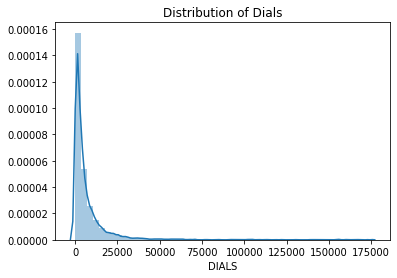

In [47]:
# Distribution with an overlay of a density plot
DIALS = overhead2['DIALS']
age_dist = sn.distplot(DIALS)
age_dist.set_title("Distribution of Dials")

Text(0.5, 1.0, 'Distribution of RPCs')

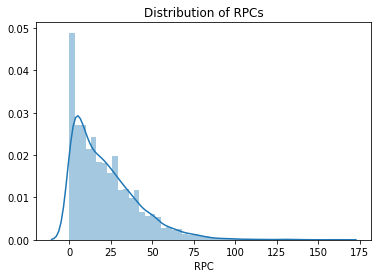

In [48]:
RPC = overhead2['RPC']
age_dist = sn.distplot(RPC)
age_dist.set_title("Distribution of RPCs")

In [49]:
# There also seems to be noise in RPC data, due to outliers. Suggest to take a closer look to this valiable 

Text(0.5, 1.0, 'Distribution of PTPs')

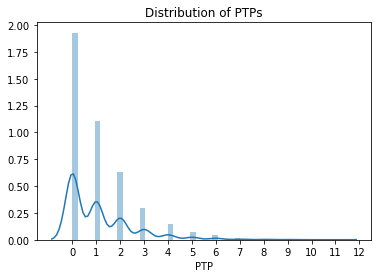

In [50]:
PTP = overhead2['PTP']
age_dist = sn.distplot(PTP)
plt.xticks(np.arange(0,13,1))
age_dist.set_title("Distribution of PTPs")

Text(0.5, 1.0, 'Distribution of Production Hours')

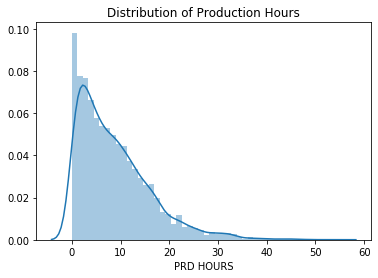

In [51]:
PRDHOURS = overhead2['PRD HOURS']
age_dist = sn.distplot(PRDHOURS)
age_dist.set_title("Distribution of Production Hours")

Text(0.5, 1.0, 'Distribution of PST Time')

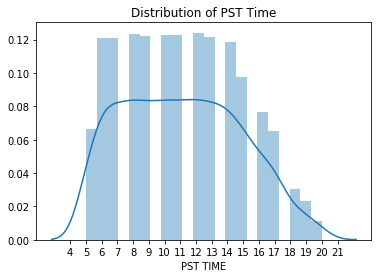

In [52]:
PSTTIME = overhead2['PST TIME']
age_dist = sn.distplot(PSTTIME)
plt.xticks(np.arange(4,22,1))
age_dist.set_title("Distribution of PST Time")

In [53]:
# Per Scatter plots it's observed Distributions are positive skewed, or skewed to the right
# The distribution graphs can be very helpful to determine the best fitting model
# https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc

# At this I spend sometime learning a new skill to convert skewed variables (logaritmic distribution)
# However given the short time to deliver this project I only made and soft and exploratory approach and decided to
# move on with the raw data from original dataset
# Refer to http://localhost:8888/notebooks/MCM%20Regression%20Analysis.ipynb

In [55]:
overhead2 = overhead2.rename(columns= {'PRD HOURS': 'PRD_HOURS'})
for col in overhead2.columns: 
    print(col) 

MONTH
WEEK DAY
PST TIME
DIALS
RPC
PTP
HEADCOUNT
PRD_HOURS


In [ ]:
# Buils and Evaluate Models 
# *********** MCM DATA ************* REGRESSION APPROACH *****************

# Regression Analysis is based on Continuous(Numerical) Variables vs Classification Analisys is based on Discrete Variables

In [ ]:
# Selecting and Dividing the Data

In [63]:
# Selecting Data - all features
overhead2

,MONTH,WEEK DAY,PST TIME,DIALS,RPC,PTP,HEADCOUNT,PRD_HOURS
0,1,3,5,2973,23,3,12,8.54
1,1,3,6,3014,24,1,11,7.52
2,1,3,7,3903,20,0,10,7.92
3,1,3,8,2919,31,2,13,8.08
4,1,3,9,1756,48,4,19,11.57
...,...,...,...,...,...,...,...,...
4805,3,6,14,6059,69,2,21,14.57
4806,3,6,15,10452,44,1,22,11.59
4807,3,6,16,6522,39,1,22,12.54
4808,3,6,17,7687,31,2,21,10.61


In [64]:
# Select the Dependent Variable 

# dependent variable
depVar = overhead2['PTP']

In [65]:
# Establish the training set for the X-variables 

#Training Set (Feature Space: X Training) this is 70% of the dataset, this is 3350 entries
X_train = (overhead2[: 3350])
X_train.head()

,MONTH,WEEK DAY,PST TIME,DIALS,RPC,PTP,HEADCOUNT,PRD_HOURS
0,1,3,5,2973,23,3,12,8.54
1,1,3,6,3014,24,1,11,7.52
2,1,3,7,3903,20,0,10,7.92
3,1,3,8,2919,31,2,13,8.08
4,1,3,9,1756,48,4,19,11.57


In [66]:
# Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

#Dependent Variable Training Set (y Training)
y_train = depVar[: 3350]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 3350


0    3
1    1
2    0
3    2
4    4
Name: PTP, dtype: int64

In [67]:
# Establish the testing set for the X-Variables, this is 30% of the dataset, this is 1437 entries

#Testing Set (X Testing)
X_test = overhead2[-1437:]
X_test_count = len(X_test.index)
print('The number of observations in the testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the testing set is: 1437
      MONTH  WEEK DAY  PST TIME  DIALS  RPC  PTP  HEADCOUNT  PRD_HOURS
3366     10         4         6   3126    8    0          6       4.61
3367     10         4         7   4376    7    0          6       3.97
3368     10         4         8  46462   38    2         27      17.92
3369     10         4         9   8768   20    1         22       8.74
3370     10         4        10  17945   30    0         27      13.66


In [68]:
# Training Data is divided into two parts: X-train and y_train
# Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)

# Establish Ground truth 

#Ground Truth (y_test) 
y_test = depVar[-1437:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1437


3366    0
3367    0
3368    2
3369    1
3370    0
Name: PTP, dtype: int64

In [69]:
# Cross Validate

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((2512, 8), (838, 8))

In [70]:
# Building the Models and Choosing the Right Model

# 1. Imports (already done above)
# 2. Models (Establish variables that will be use for defining each model)
# Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [71]:
# 3. It is a good idea to establish a variable specifically for your features
# so you will have full control over what is being used for training

features = overhead2
print('Summary of feature sample')
features.head()

Summary of feature sample


,MONTH,WEEK DAY,PST TIME,DIALS,RPC,PTP,HEADCOUNT,PRD_HOURS
0,1,3,5,2973,23,3,12,8.54
1,1,3,6,3014,24,1,11,7.52
2,1,3,7,3903,20,0,10,7.92
3,1,3,8,2919,31,2,13,8.08
4,1,3,9,1756,48,4,19,11.57


In [72]:
# 4. Not mandatory, but it might be a good idea to validate that the correct column is being used for the dependent variable
# dependent variable
print(depVar)

0       3
1       1
2       0
3       2
4       4
       ..
4805    2
4806    1
4807    1
4808    2
4809    1
Name: PTP, Length: 4787, dtype: int64


In [ ]:
# 5. Use the model variables (established in step 2)

# model.fit(X_train,y_train)

In [73]:
# 6. Random Forest

modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
# 7. Support Vector Regression

modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
# 8. Linear Regression

modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
# Choosing the Right Model (Cross Validation Score)

print(cross_val_score(modelRF, X_train, y_train)) 
print(cross_val_score(modelSVR, X_train, y_train)) 
print(cross_val_score(modelLR, X_train, y_train)) 

#These values correspond to the the following:

# 1st value: The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
# 2nd value: The time for fitting the estimator on the train set for each cv split.
# 3rd Value: The time for scoring the estimator on the test set for each cv split. 

[0.9985381  0.99900393 0.99802404]
[-0.04069866 -0.02670368 -0.01126776]
[1. 1. 1.]


In [77]:
# Model Fitting Random Forest
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.99814949 0.99900393 0.99713125]


0.9999608061642222

In [78]:
# Given the high accuracy of the RF model 99.9%, concerns about overfitting but also explains "high linearity" of the data
# Consider testing model with all variables, maybe will reduce accuracy however, model could be more robust to face changes
# from the datasource. For example if we add more observation to the data set to put model in production, and/or to predict
# PTP from different teams which handle different inventory characteristics

In [79]:
#Make Predictions Random Forest
predictions = modelRF.predict(X_test)

In [80]:
# Evaluate Results Random Forest
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.996
RMSE: 0.086


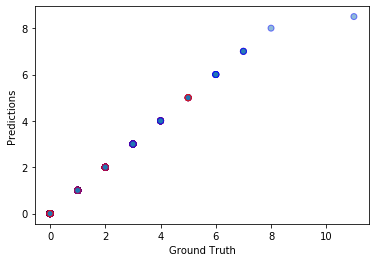

In [81]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [82]:
#Make Predictions for Support Vector Regression

predictions = modelSVR.predict(X_test)

# Evaluating the Results 

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.021
RMSE: 1.406


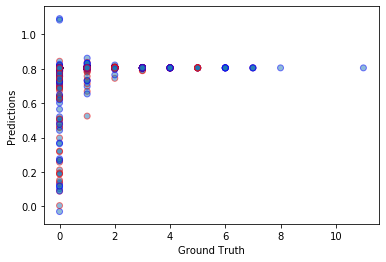

In [83]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [84]:
#Make Predictions for Linear Regression

# This model is overfitted --> do not recommend 

predictions = modelLR.predict(X_test)

# Evaluating the Results 

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.000


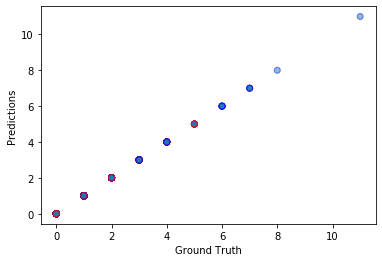

In [85]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [86]:
# Feature Engineering

In [87]:
# PCA feature engineering
# PCA is a dimensionality reduction that identifies important relationships in our data, 
# transforms the existing data based on these relationships, and then quantifies the importance of these relationships
# so we can keep the most important relationships and drop the others
# Determines how much variation each principal component accounts for

In [88]:
from sklearn.decomposition import PCA 
from sklearn import preprocessing 

In [90]:
# At this point I'm more interested in determining how strong is the relationships among variables than looking for a
# better dataset/ optimized dataset to increase accuracy of the model 

# PCA analysis is a new skilled learned on the go, as this is not present in the plan of attack for previous cases  

featuresPCA = overhead2
print('Summary of feature sample')
features.head()

Summary of feature sample


,MONTH,WEEK DAY,PST TIME,DIALS,RPC,PTP,HEADCOUNT,PRD_HOURS
0,1,3,5,2973,23,3,12,8.54
1,1,3,6,3014,24,1,11,7.52
2,1,3,7,3903,20,0,10,7.92
3,1,3,8,2919,31,2,13,8.08
4,1,3,9,1756,48,4,19,11.57


In [96]:
# Before we do PCS we need to center and scale the data

scaled_data = preprocessing.scale(featuresPCA.T) # T as in transpose, this because we need data in rows not columns

In [97]:
pca = PCA() # PCA in a data set, not in a machine learning setting 
pca.fit(scaled_data) # Calculate loading scores and the variation each principal component accounts for 
pca_data= pca.transform(scaled_data) # Generated coordinates for a PCA graph based on loading scores and the scaled data 

In [103]:
# draw a graph
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1) # calculate the percentage of variation
                                                                     # that each principal component accounts for 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # Create labels for scree plot

In [104]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

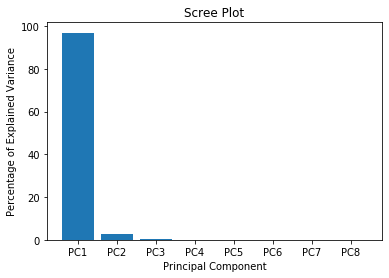

In [107]:
plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# Almost all of the variation is along the first PC (principal component), 
# so PC1 should do a good job representing the original data 

In [108]:
pca_df = pd.DataFrame(pca_data, index=[featuresPCA], columns=labels)

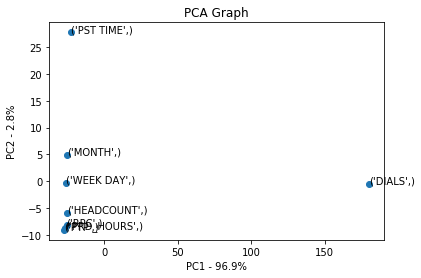

In [109]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [110]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
MONTH,-25.300766,4.938759,8.250265,-0.492522,-0.145181,-0.045711,-0.010491,-1.245531e-14
WEEK DAY,-26.082082,-0.277714,-0.592552,5.221282,0.111817,0.031563,-0.025679,-1.295491e-14
PST TIME,-23.131309,27.763531,-2.885085,-0.934648,-0.154599,-0.038655,0.001760,-4.579670e-15
DIALS,180.175768,-0.479770,0.000355,0.010659,-0.007138,-0.007941,0.002489,1.032785e-13
RPC,-25.805015,-8.216108,-1.234108,-1.004340,-0.904766,1.304705,-0.411650,-1.568190e-14
PTP,-27.278586,-9.074287,-1.321558,-0.722007,-1.291096,-0.306018,0.724458,-1.641742e-14
HEADCOUNT,-25.755557,-5.864665,-0.831334,-1.106149,2.360068,0.342668,0.246102,-1.719458e-14
PRD_HOURS,-26.822452,-8.789746,-1.385982,-0.972275,0.030895,-1.280611,-0.526988,-1.779132e-14


In [ ]:
# As matter fact columns preserved from original data set does not have any relevance for modeling as observed in the 
# correlation matrix 
# Hence does not make sense to continue further with this approach as results will be very similar to
# Regression Analysis with selected features 
# instead would suggest to test with more algorithms 